In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("spambase.csv")

# Split the dataset into features and labels
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
# print(data.isnull().sum())
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

0.9268645908761767
[[766  38]
 [ 63 514]]


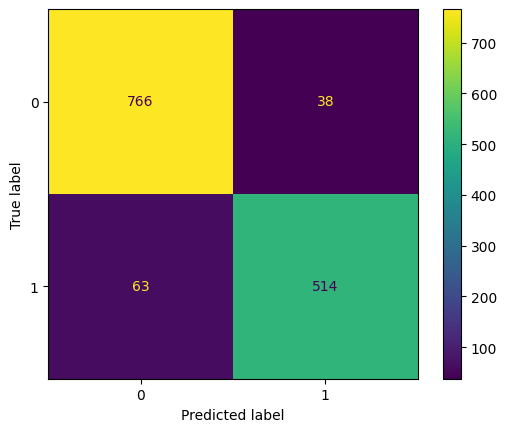

In [50]:
from sklearn.svm import SVC
linear_svm=SVC(kernel='linear',random_state=42)
linear_svm.fit(x_train,y_train)

y_pred_linear=linear_svm.predict(x_test)

acc=accuracy_score(y_test,y_pred_linear)
conf=confusion_matrix(y_test,y_pred_linear)


print(acc)
print(conf)

dis=ConfusionMatrixDisplay(confusion_matrix=conf)
dis.plot()
plt.show()



0.9370021723388848
[[777  27]
 [ 60 517]]


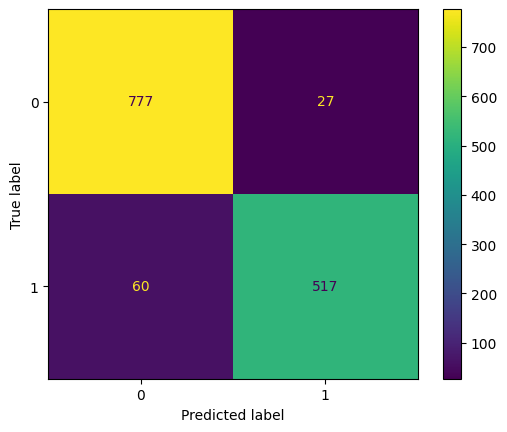

In [51]:
rbf_svm=SVC(kernel='rbf',random_state=42)
rbf_svm.fit(x_train,y_train)

y_pred_rbf=rbf_svm.predict(x_test)

accc=accuracy_score(y_test,y_pred_rbf)
conff=confusion_matrix(y_test,y_pred_rbf)


print(accc)
print(conff)

diss=ConfusionMatrixDisplay(confusion_matrix=conff)
diss.plot()
plt.show()

0.8305575669804489
[[785  19]
 [215 362]]


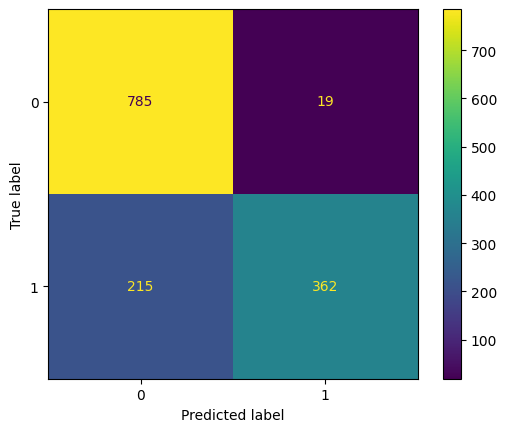

0.7530774800868936
[[790  14]
 [327 250]]


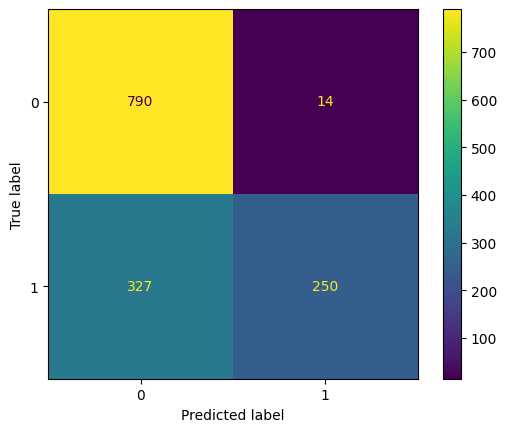

0.7125271542360608
[[794  10]
 [387 190]]


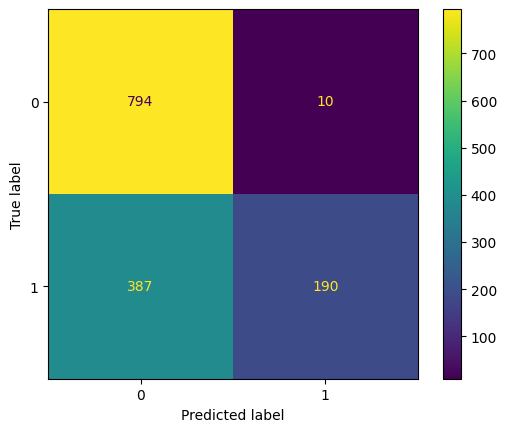

In [52]:
d=[2,3,4]
accl=[]
for i in d:
 poly_svm=SVC(kernel='poly',degree=i,random_state=42)
 poly_svm.fit(x_train,y_train)

 y_pred_poly=poly_svm.predict(x_test)

 acccc=accuracy_score(y_test,y_pred_poly)
 accl.append(acccc)
 confff=confusion_matrix(y_test,y_pred_poly)


 print(acccc)
 print(confff)

 disd=ConfusionMatrixDisplay(confusion_matrix=confff)
 disd.plot()
 plt.show()

In [53]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

linear_svm_pca=SVC(kernel='linear',random_state=42)
linear_svm_pca.fit(x_train_pca,y_train)
rbf_svm_pca=SVC(kernel='rbf',random_state=42)
rbf_svm_pca.fit(x_train_pca,y_train)
poly_svm_pca=SVC(kernel='poly',degree=3,random_state=42)
poly_svm_pca.fit(x_train_pca,y_train)






SVC(kernel='poly', random_state=42)

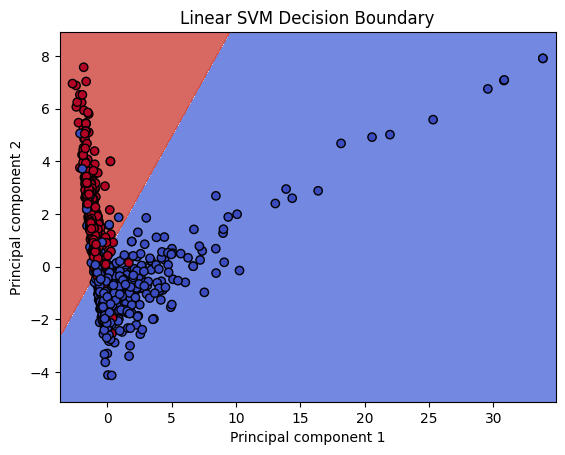

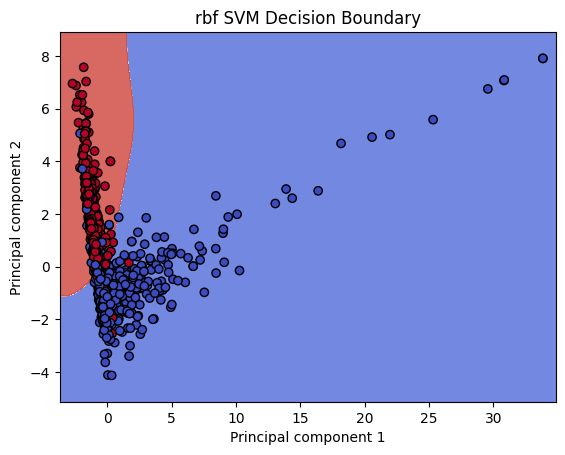

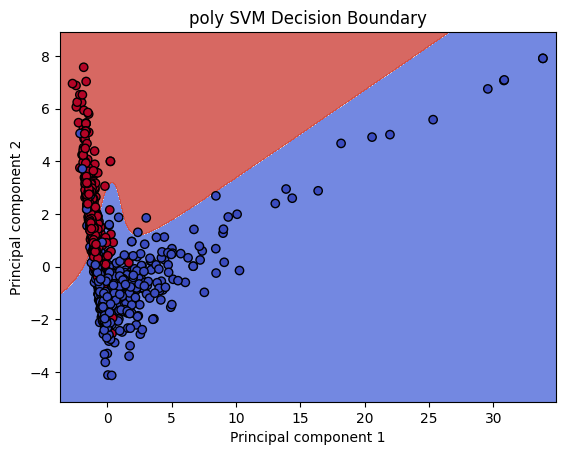

In [54]:
def plot_decision_boundary(model,x,y,title):
    h=0.02
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm,edgecolors='k')
    plt.title(title)
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.show()

plot_decision_boundary(linear_svm_pca,x_test_pca,y_test,'Linear SVM Decision Boundary')
plot_decision_boundary(rbf_svm_pca,x_test_pca,y_test,'rbf SVM Decision Boundary')
plot_decision_boundary(poly_svm_pca,x_test_pca,y_test,'poly SVM Decision Boundary')

In [55]:
print("Comparison of SVM Models:")
print(f"Linear SVM Accuracy: {acc}")
print(f"RBF SVM Accuracy: {accc}")
for degree in d:
    print(f"Polynomial SVM (degree {degree}) Accuracy: {accl[degree-d[0]]}")


Comparison of SVM Models:
Linear SVM Accuracy: 0.9268645908761767
RBF SVM Accuracy: 0.9370021723388848
Polynomial SVM (degree 2) Accuracy: 0.8305575669804489
Polynomial SVM (degree 3) Accuracy: 0.7530774800868936
Polynomial SVM (degree 4) Accuracy: 0.7125271542360608
